In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets
(train_data , train_labels) ,  (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training examples
print(f"Training sample:\n {train_data[0]}\n")
print(f"Training label:\n {train_labels[0]}\n")

Training sample:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [ ]:
# Check the shape of a single example
train_data[0].shape , train_labels[0].shape

((28, 28), ())

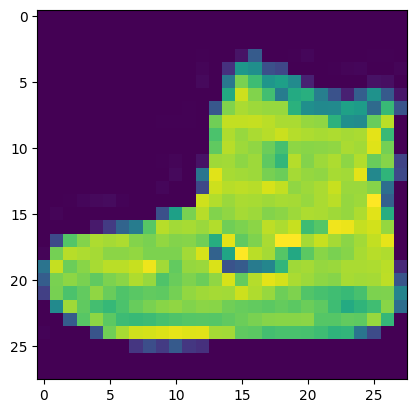

In [ ]:
# PLot the single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [ ]:
# Create a small list so we can index onto our training labels so they are human readable
class_names = ["T-shirt/top" , "Trouser" , "Pullover" ,	"Dress" , "Coat", "Sandal" , "Shirt" , "Sneaker" , "Bag" , "Ankle boot"]



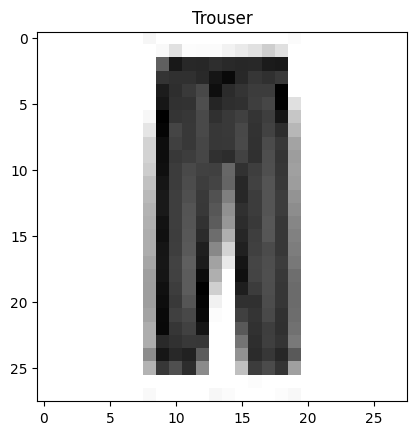

In [ ]:
# Plot an example image and its label
index_of_choice = 21
plt.imshow(train_data[index_of_choice] , cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]]);

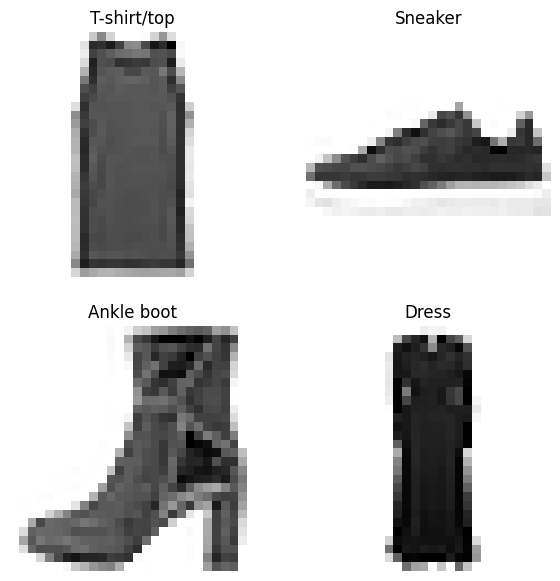

In [ ]:
# plot multiple random images of fashion mnist
import random
plt.figure(figsize=(7,7),)
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  random_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[random_index] , cmap=plt.cm.binary)
  plt.title(class_names[train_labels[random_index]])
  plt.axis(False)

## Building a multi-class classfication model

For our multi-class classification model , we can use a similar architecture  to our binary classifiers , however , we're going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape =  10 (one per each class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)



If labels are not one hot encoded then use SparseCategorcialCrossentorypy() otherwise if labels are one hot encoded then use CategoricalCrossentropy() (tf.one_hot(train_labels , depth=10)

In [ ]:
# Our data needs to be flattened (from  28*28 to None,784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model =  tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4 , activation="relu"),
    tf.keras.layers.Dense(4 , activation="relu"),
    tf.keras.layers.Dense(10 , activation = tf.keras.activations.softmax)
])

# Compile a model
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit a model
non_norm_history = model.fit(train_data,
                             tf.one_hot(train_labels, depth=10),
                             epochs=10,
                             validation_data = (test_data , tf.one_hot(test_labels  ,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.4852 - accuracy: 0.0988 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3028 - val_accuracy:

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the min and max values of the training data
train_data.min() , train_data.max()

(0, 255)

Neural Networks prefer datat to be scaled (or normalized) , this means they like to have the numbers in the tensos they try to find patterns between 0 and 1

In [ ]:
# We can get our training and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled trained data
train_data_norm.min() , train_data_norm.max()

(0.0, 1.0)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_2 =  tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4 , activation="relu"),
    tf.keras.layers.Dense(4 , activation="relu"),
    tf.keras.layers.Dense(10 , activation = tf.keras.activations.softmax)
])

# Compile a model
model_2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit a model
norm_history = model_2.fit(train_data_norm,
                             tf.one_hot(train_labels, depth=10),
                             epochs=10,
                             validation_data = (test_data_norm , tf.one_hot(test_labels  ,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1771 - accuracy: 0.5674 - val_loss: 0.7818 - val_accuracy: 0.7068
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7096 - accuracy: 0.7272 - val_loss: 0.6958 - val_accuracy: 0.7332
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6432 - accuracy: 0.7638 - val_loss: 0.6635 - val_accuracy: 0.7591
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6172 - accuracy: 0.7756 - val_loss: 0.6397 - val_accuracy: 0.7679
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6048 - accuracy: 0.7806 - val_loss: 0.6320 - val_accuracy: 0.7699
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5970 - accuracy: 0.7820 - val_loss: 0.6367 - val_accuracy: 0.7676
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5906 - accuracy: 0.7857 - val_loss: 0.6210 - val_accuracy:

<Axes: title={'center': 'Normalized data'}>

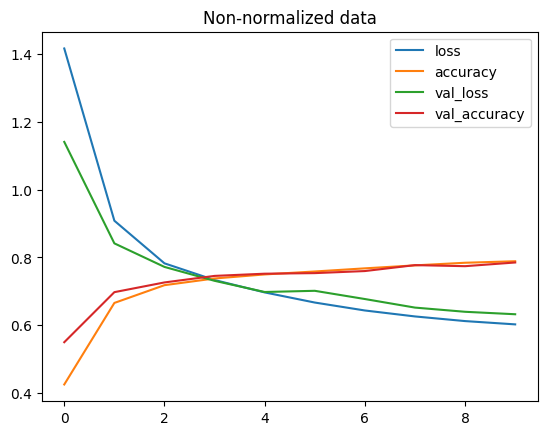

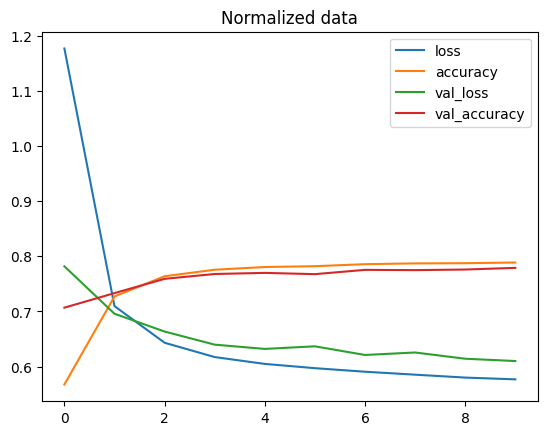

In [ ]:
import pandas as pd
# Plot non-normalized data loss curve
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized data loss curve
pd.DataFrame(norm_history.history).plot(title="Normalized data")

## Find the ideal learning rate



In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_3 =  tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4 , activation="relu"),
    tf.keras.layers.Dense(4 , activation="relu"),
    tf.keras.layers.Dense(10 , activation = "softmax")
])

# Compile a model
model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

# Fit a model
find_lr_history = model_3.fit(train_data_norm,
                             train_labels,
                             epochs=40,
                             validation_data = (test_data_norm ,test_labels),
                             callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0225 - accuracy: 0.6523 - val_loss: 0.7334 - val_accuracy: 0.7553 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6496 - accuracy: 0.7746 - val_loss: 0.6298 - val_accuracy: 0.7848 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5800 - accuracy: 0.7949 - val_loss: 0.6136 - val_accuracy: 0.7867 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5536 - accuracy: 0.8070 - val_loss: 0.5755 - val_accuracy: 0.8002 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5419 - accuracy: 0.8104 - val_loss: 0.5735 - val_accuracy: 0.8028 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5330 - accuracy: 0.8141 - val_loss: 0.6174 - val_accuracy: 0.7822 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'Finding Ideal Learning Rate')

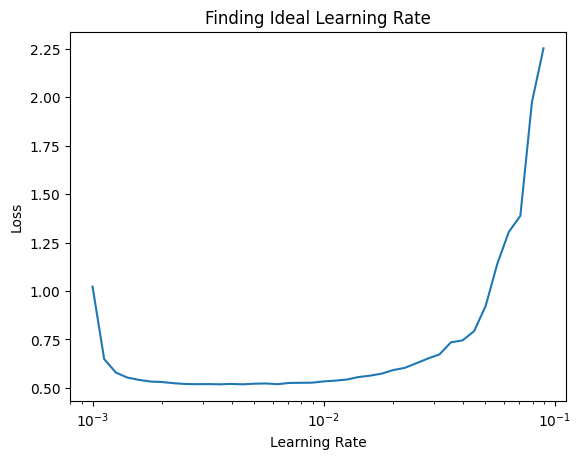

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10 ** (tf.range(40)/20))
plt.semilogx(lrs , find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding Ideal Learning Rate")

In [ ]:
# Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create a model
model_4 =  tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4 , activation="relu"),
    tf.keras.layers.Dense(4 , activation="relu"),
    tf.keras.layers.Dense(10 , activation = "softmax")
])

# Compile a model
model_4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"])

# Fit a model
history_4 = model_4.fit(train_data_norm,
                        train_labels,
                        epochs=20,
                        validation_data = (test_data_norm , test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4063 - accuracy: 0.4976 - val_loss: 0.8894 - val_accuracy: 0.7148
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7769 - accuracy: 0.7445 - val_loss: 0.7706 - val_accuracy: 0.7454
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6822 - accuracy: 0.7683 - val_loss: 0.6940 - val_accuracy: 0.7633
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6337 - accuracy: 0.7871 - val_loss: 0.6568 - val_accuracy: 0.7777
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6073 - accuracy: 0.7936 - val_loss: 0.6379 - val_accuracy: 0.7856
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5885 - accuracy: 0.8010 - val_loss: 0.6395 - val_accuracy: 0.7834
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5779 - accuracy: 0.8030 - val_loss: 0.6206 - val_accuracy:

## Evaluating our multi-class classification model


In [ ]:
# Create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true , y_pred , classes=None , figsize = (10,10) , text_size =15):

   # Create a confusion matrix
    cm = confusion_matrix(y_true,y_pred)
    cm_norm = cm.astype("float")/ cm.sum(axis=1) [:,np.newaxis] # normalize our confusion matrix
    n_classes = cm.shape[0]

    # Let's prettify it
    fig , ax =  plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax =  ax.matshow(cm,cmap=plt.cm.Blues)

    fig.colorbar(cax)


    # Set labels to be classes
    if classes:
      labels=classes
    else:
      labels=np.arange(cm.shape[0])

    # label the axis
    ax.set(title="Confusion Matrix",
          xlabel="Predicted label",
          ylabel="True label",
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes),
          xticklabels=labels,
          yticklabels=labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i,j in itertools.product(range(cm.shape[0]) , range(cm.shape[1])):
      plt.text(j,i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i,j] > threshold else "black",
              size=text_size)

In [ ]:
# Make some prediction with our model
y_probs =  model_4.predict(test_data_norm)

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[1.58413328e-04, 6.40465032e-06, 4.81188290e-05, 3.63352854e-04,
        3.78667319e-04, 1.85299978e-01, 4.60349198e-04, 1.93820998e-01,
        4.16581344e-04, 6.19047105e-01],
       [5.11375605e-04, 6.39689262e-08, 6.09263897e-01, 9.27921428e-06,
        2.49901824e-02, 1.34940493e-27, 3.65213186e-01, 0.00000000e+00,
        1.20536315e-05, 0.00000000e+00],
       [1.42858054e-08, 9.98798847e-01, 1.22581783e-04, 2.04073862e-04,
        8.74080870e-04, 2.59573396e-21, 3.97268508e-07, 0.00000000e+00,
        3.59286033e-13, 2.84991891e-30],
       [1.20776971e-08, 9.99528706e-01, 1.74137513e-05, 4.16366616e-04,
        3.74823248e-05, 1.49399471e-21, 4.06811829e-08, 0.00000000e+00,
        8.64245334e-15, 1.03051107e-28],
       [7.84090385e-02, 4.91945902e-05, 1.83249503e-01, 1.71366353e-02,
        5.31550460e-02, 1.74648948e-10, 6.63353860e-01, 0.00000000e+00,
        4.64661885e-03, 1.44674545e-28]], dtype=float32)

In [ ]:
y_probs[0] , tf.argmax(y_probs[0])  , class_names[tf.argmax(y_probs[0])]

(array([1.5841333e-04, 6.4046503e-06, 4.8118829e-05, 3.6335285e-04,
        3.7866732e-04, 1.8529998e-01, 4.6034920e-04, 1.9382100e-01,
        4.1658134e-04, 6.1904711e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
# Convert all of the predictions probabilites into integers
y_preds =  y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[720,   1,   7, 102,   8,   3, 146,   0,  13,   0],
       [  0, 945,   8,  37,   8,   0,   1,   0,   1,   0],
       [ 10,   7, 526,  22, 217,   0, 213,   0,   5,   0],
       [ 38,  16,  19, 837,  33,   3,  52,   0,   2,   0],
       [  0,   8,  63,  29, 802,   2,  90,   0,   6,   0],
       [  0,   0,   0,   1,   1, 917,   1,  41,  10,  29],
       [135,   0,  72,  62, 157,   1, 543,   0,  29,   1],
       [  0,   0,   0,   0,   0,  55,   0, 917,   0,  28],
       [  1,   0,   0,   7,  10,  31,  61,   3, 887,   0],
       [  0,   0,   0,   6,   0,  24,   0,  50,   2, 918]])

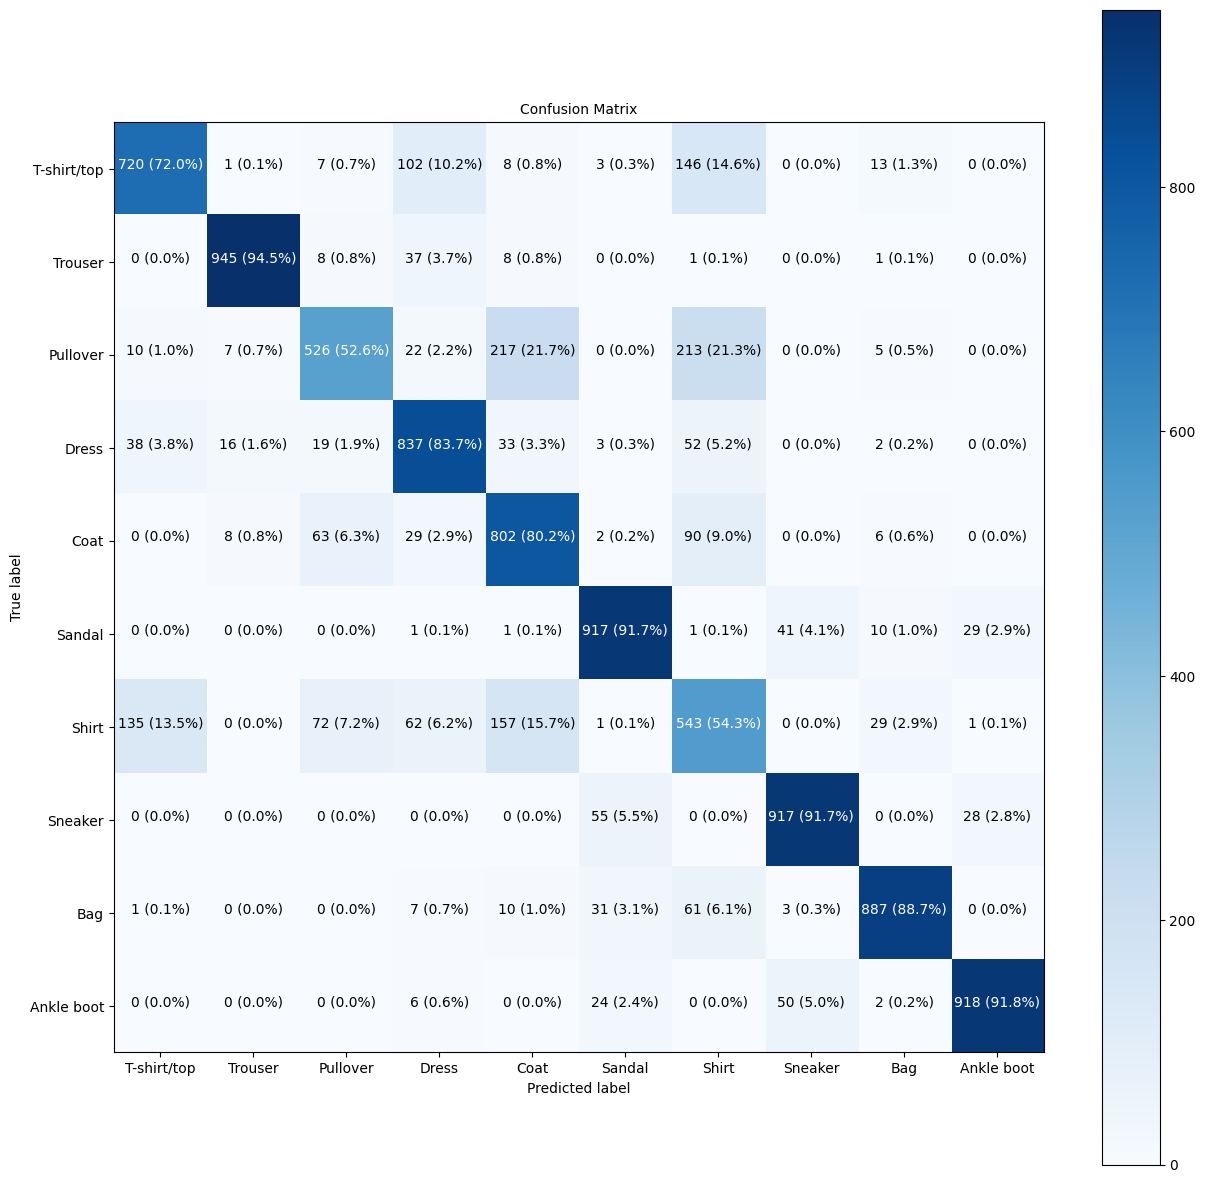

In [ ]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

**How about we create a fun little function for:**

* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [ ]:
import random

def plot_random_image(model , images ,  true_labels, classes):
  """
  Picks a random image , plots it and labels it with a prediction and truth label.
  """
  # Setup random integer
  i = random.randint(0,len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image , cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color="green"
  else:
    color="red"

    # Add xlabel information (predictions/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                     100*tf.reduce_max(pred_probs),
                                                     true_label),
               color=color) # Set the color to green or red based on if prediction is right or wrong

1/1 [==============================] - 0s 22ms/step


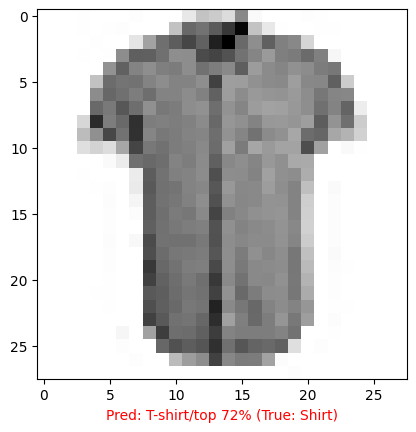

In [ ]:
# Check out random image as well as its prediction
plot_random_image(model=model_4,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model training ?

In [ ]:
# Find the layers of our most recent model
model_4.layers

In [ ]:
# Extract a particular layer
model_4.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weights , biases =  model_4.layers[1].get_weights()

# Shapes
weights , weights.shape

(array([[-0.5359869 , -0.01036583, -0.15739188,  0.7575894 ],
        [-1.0046709 ,  0.44277385, -0.75148153,  0.40795124],
        [-1.6145626 ,  0.13305052, -0.30665502,  0.6136191 ],
        ...,
        [ 0.19557999,  0.10445805, -0.5204712 ,  0.0805102 ],
        [ 0.53506243, -0.16875708, -0.60835207, -0.8611034 ],
        [-0.06577425,  0.24300122, -0.25840023,  0.23806112]],
       dtype=float32),
 (784, 4))

In [ ]:
model_4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 4)                 3140      
                                                                 
 dense_22 (Dense)            (None, 4)                 20        
                                                                 
 dense_23 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now let's check out the bias vector...

In [ ]:
biases , biases.shape

(array([ 1.3394792, -2.1669993,  1.9280541,  1.5083508], dtype=float32), (4,))

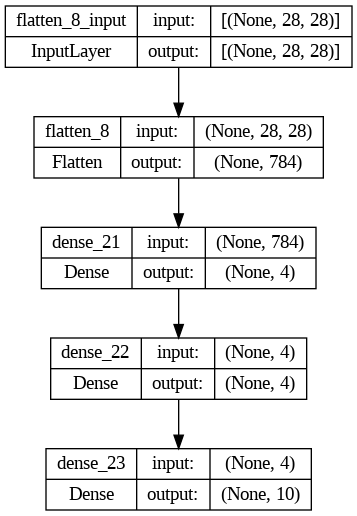

In [ ]:
# Let's check out another of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each other
plot_model(model_4 , show_shapes=True)